# Task 1

We are demonstrating the use of a **bold** and *italics* text (and the use of a title above). 

# Task 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [2]:
from Scripts.functions import load_and_process

Our Method chaining 1 and 2 (load_and_process)- We renamed columns, dropped columns, calculated, assigned causal ratios, calculated an average temperature and made the columns more descriptive)

It can be found in the 'functions.py' folder found in 'Scripts'

In [3]:
df=load_and_process('../Data/Raw/hour.csv')

In [4]:
df

,Instant,Date,Season,yr,Month,Hour,Holiday?,Day of Week,Workday?,Weather Situation,Temperature,Feeling Temperature,Wind Speed,Casual Users,Registered User,Total Users,Casual_Ratio,Average_temperature
0,1,2011-01-01,Winter,0,January,0,False,Saturday,False,Sunny,9.84,14.395,0.0000,3,13,16,0.187500,0.26395
1,2,2011-01-01,Winter,0,January,1,False,Saturday,False,Sunny,9.02,13.635,0.0000,8,32,40,0.200000,0.24635
2,3,2011-01-01,Winter,0,January,2,False,Saturday,False,Sunny,9.02,13.635,0.0000,5,27,32,0.156250,0.24635
3,4,2011-01-01,Winter,0,January,3,False,Saturday,False,Sunny,9.84,14.395,0.0000,3,10,13,0.230769,0.26395
4,5,2011-01-01,Winter,0,January,4,False,Saturday,False,Sunny,9.84,14.395,0.0000,0,1,1,0.000000,0.26395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Winter,1,December,19,False,Monday,True,Cloudy,10.66,12.880,11.0014,11,108,119,0.092437,0.25880
17375,17376,2012-12-31,Winter,1,December,20,False,Monday,True,Cloudy,10.66,12.880,11.0014,8,81,89,0.089888,0.25880
17376,17377,2012-12-31,Winter,1,December,21,False,Monday,True,Sunny,10.66,12.880,11.0014,7,83,90,0.077778,0.25880
17377,17378,2012-12-31,Winter,1,December,22,False,Monday,True,Sunny,10.66,13.635,8.9981,13,48,61,0.213115,0.26635


In [27]:
df.describe(exclude=np.object).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Instant,17379,NaN,NaN,NaN,8690,5017.03,1,4345.5,8690,13034.5,17379
yr,17379,NaN,NaN,NaN,0.502561,0.500008,0,0,1,1,1
Hour,17379,NaN,NaN,NaN,11.5468,6.91441,0,6,12,18,23
Holiday?,17379,2,False,16879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Workday?,17379,2,True,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,17379,NaN,NaN,NaN,20.3765,7.8948,0.82,13.94,20.5,27.06,41
Feeling Temperature,17379,NaN,NaN,NaN,23.7888,8.59251,0,16.665,24.24,31.06,50
Wind Speed,17379,NaN,NaN,NaN,12.7365,8.1968,0,7.0015,12.998,16.9979,56.9969
Casual Users,17379,NaN,NaN,NaN,35.6762,49.305,0,4,17,48,367
Registered User,17379,NaN,NaN,NaN,153.787,151.357,0,34,115,220,886


In [29]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Date,17379,731,2011-04-07,24
Season,17379,4,Summer,4496
Month,17379,12,May,1488
Holiday?,17379,2,False,16879
Day of Week,17379,7,Saturday,2512
Workday?,17379,2,True,11865
Weather Situation,17379,4,Sunny,11413


# Task 4 - EDA (Medha)

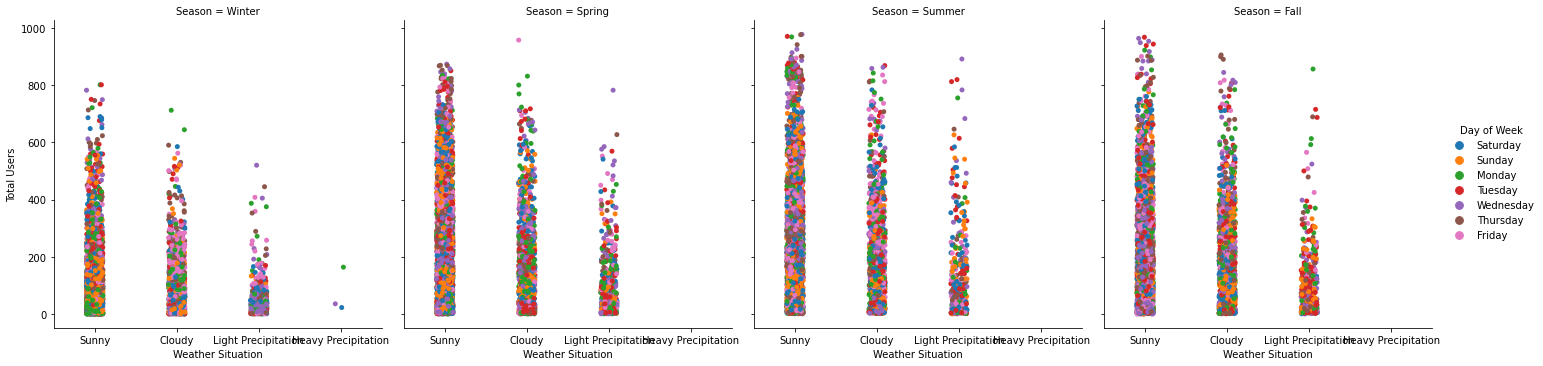

In [5]:
graph=sns.catplot(data=df, y= "Total Users",x= "Weather Situation", hue= "Day of Week",col="Season")
#mention that 0 is sunday.

The four graphs show the total amount of bicycle users per season. There seems to be a direct correlation between the weather condition and the amount of users. Unsurprisingly, there seems to be little to no bicycle riders when the weather is bad. There also seems to be less bicycle riders during season 1 which is winter. 

There are four graphs, each representing different seasons. I am trying to investigate whether there is a correlation between total users and holidays per season. It is interesting to see that people consistently, across all seasons, use their bicycles less during holidays


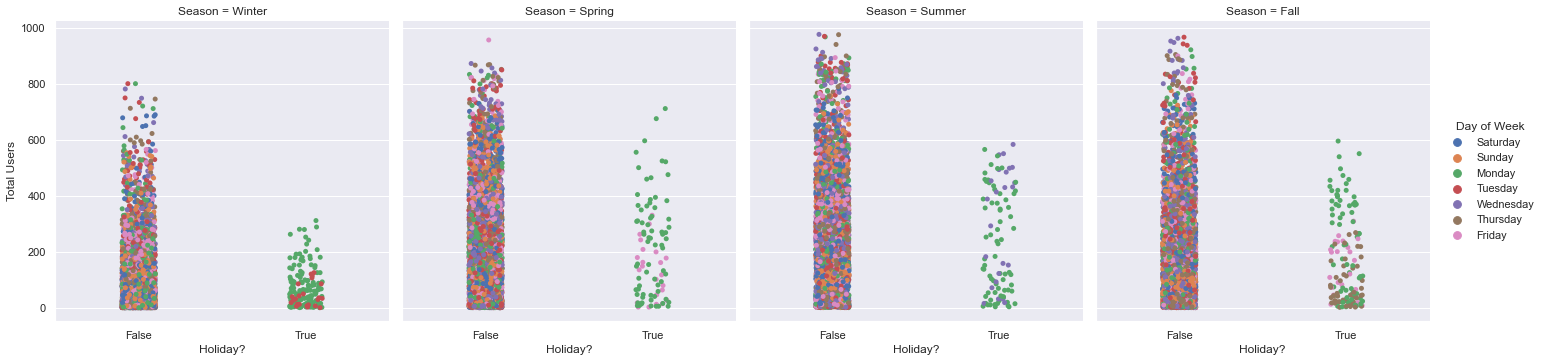

In [15]:
graph_1=sns.catplot(data=df, y= "Total Users",x= "Holiday?", hue= "Day of Week",col="Season")
print("There are four graphs, each representing different seasons. I am trying to investigate whether there is a correlation between total users and holidays per season. It is interesting to see that people consistently, across all seasons, use their bicycles less during holidays")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Season', ylabel='Total Users'>

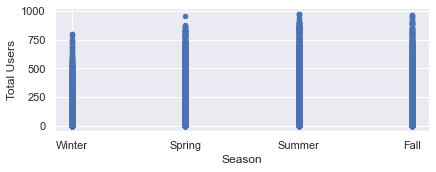

In [16]:
df.plot(kind='scatter',x='Season', y='Total Users')
#Relationship between Total Users and Seasonave less total users than month 2,3,and 4 respectively- month 1 seems to h

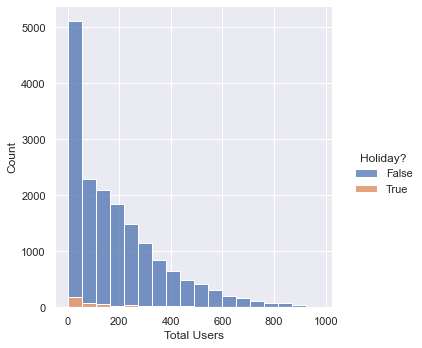

In [17]:
sns.displot(data=df, x = "Total Users", bins=18, hue = "Holiday?", multiple="stack")

plt.show()

#It is now clearer that people barely use their bicycles during holidays

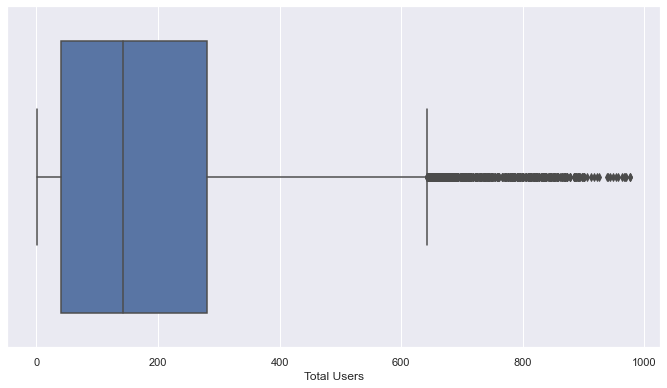

In [26]:
sns.boxplot(data=df, x= ("Total Users"), hue= 'Day of Week')
plt.show()

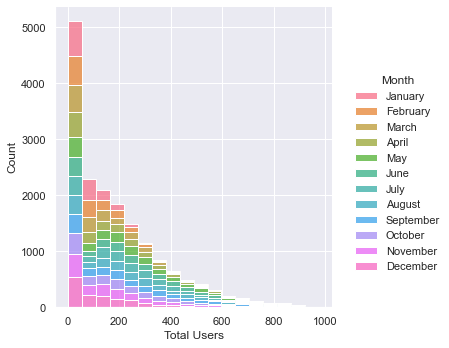

In [19]:
sns.displot(data=df, x = "Total Users", bins=18, hue = "Month",multiple="stack")

#The histogram below shows that months 1-4 have less users than the later ones (5-12)

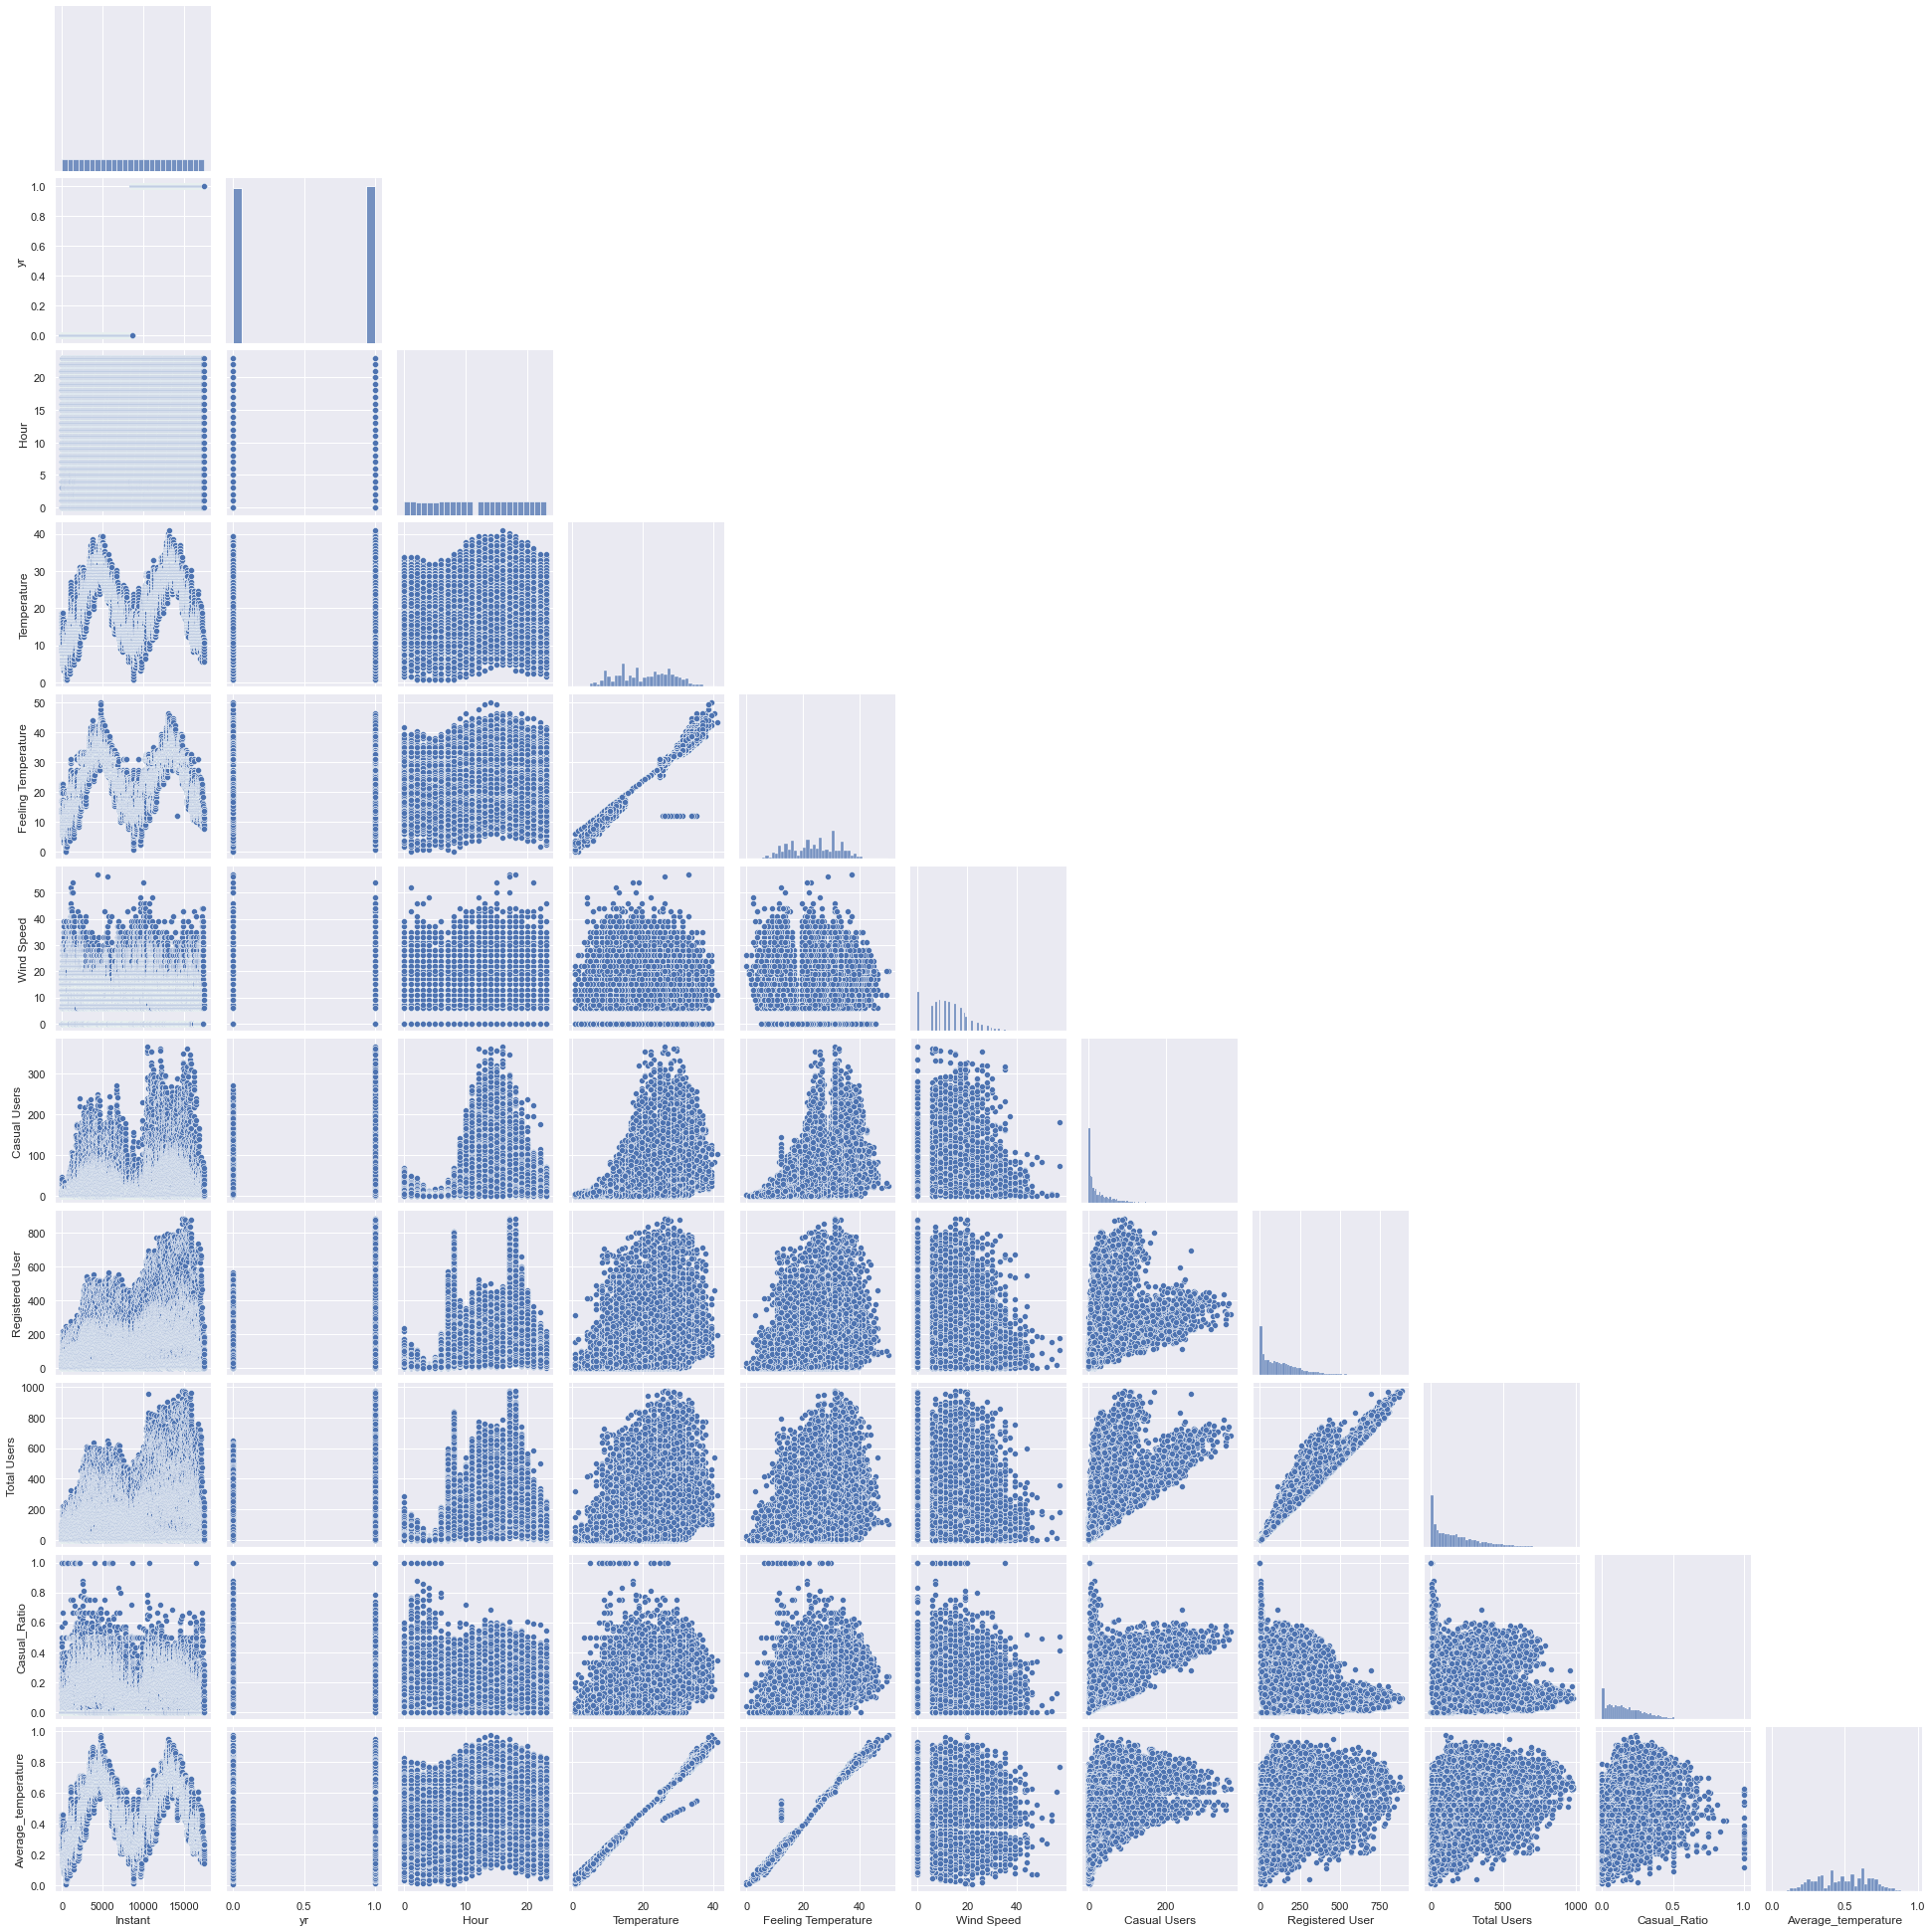

In [30]:
sns.pairplot(data=df.select_dtypes(include='number'), 
             corner=True)

#Exploring dataset possibilities

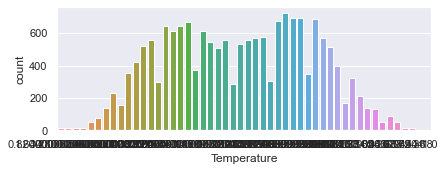

In [21]:
sns.countplot(x='Temperature', data=df)
sns.set(rc={'figure.figsize':(11.7,6.27)})
#Show counts of Temperature

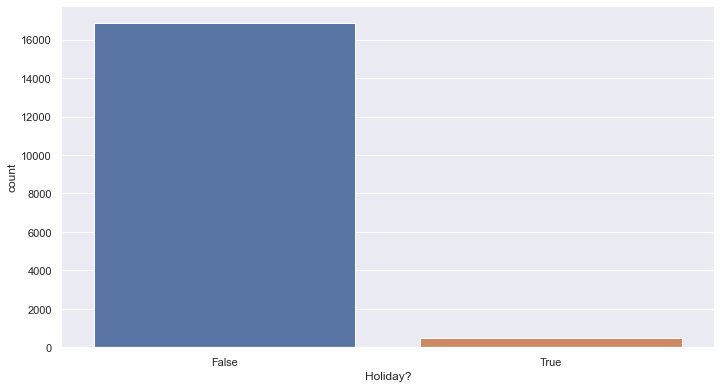

In [13]:
sns.countplot(x='Holiday?', data=df)
sns.set(rc={'figure.figsize':(11.7,6.27)})
#Show counts of Holidays

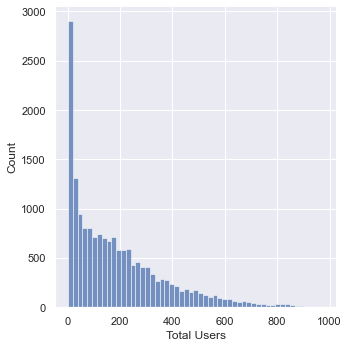

In [14]:
sns.displot(x='Total Users', data=df)
sns.set(rc={'figure.figsize':(6.7,2.27)})
#Show counts of total users+change size of graph from Amir's code

# Task 4 - Olivia

<AxesSubplot:xlabel='count', ylabel='Season'>

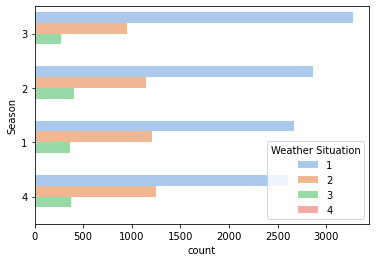

In [10]:
sns.countplot(data=df, y= "Season", palette= 'pastel', order= df['Season'].value_counts().index[:], hue= 'Weather Situation')


Interestingly, the general ratio of the different weather situations did not change drastically beetween the seasons, and there were many sunny days - it must be beautiful in DC all year round!

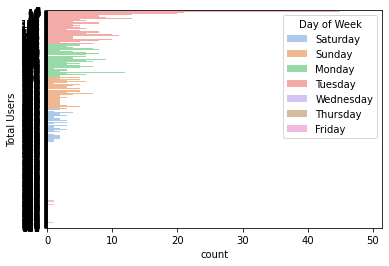

In [8]:
sns.countplot(data=df, y= ("Total Users"), palette= 'pastel', order= df['Total Users'].value_counts().index[:], hue= 'Day of Week')

plt.show()

From this plot, it is evident that the count of total users is very high on Tuesdays, and Mondays. There are also a fair amount of users on the weekends (Saturday and Sunday).

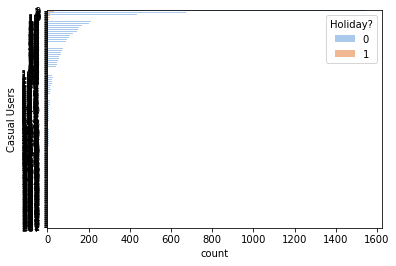

In [13]:
sns.countplot(data=df, y= ("Casual Users"), palette= 'pastel', order= df['Casual Users'].value_counts().index[:], hue= 'Holiday?')

plt.show()


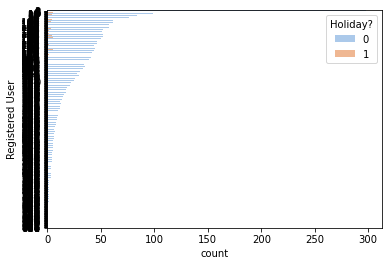

In [14]:
sns.countplot(data=df, y= ("Registered User"), palette= 'pastel', order= df['Registered User'].value_counts().index[:], hue= 'Holiday?')

plt.show()

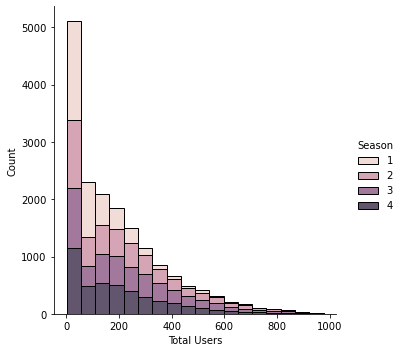

In [15]:
sns.displot(data=df, x = "Total Users", bins=18, hue = "Season", multiple="stack")

plt.show()

The histogram shows that the count of total users is higher for a smaller amount of users. 

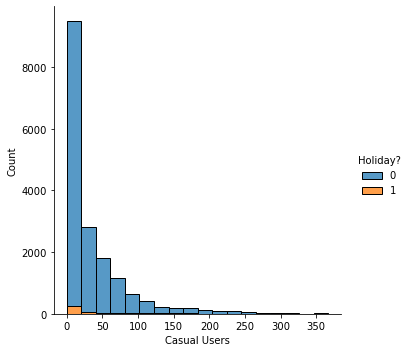

In [16]:
sns.displot(data=df, x = "Casual Users", bins=18, hue = "Holiday?", multiple="stack")

plt.show()

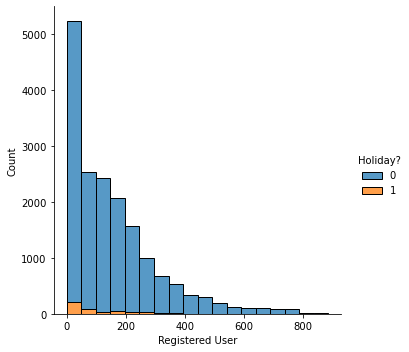

In [17]:
sns.displot(data=df, x = "Registered User", bins=18, hue = "Holiday?", multiple="stack")

plt.show()

# Task 5 - Analysis

**Research Questions:**
    
1. What is the relationship between day of the week, and number of casual vs. registered users? Are there more registered users on weekdays, and casual users on weekends?
   
2. Does weather affect the total number of users?
    
3. Is there a spike in number of users on holidays?

1. What is the relationship between day of the week, and number of casual vs. registered users? Are there more registered users on weekdays, and casual users on weekends?

<AxesSubplot:xlabel='Day of Week', ylabel='Casual Users'>

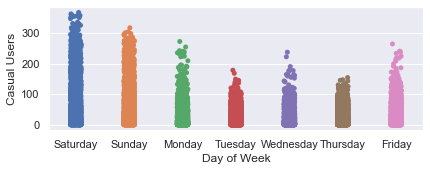

In [16]:
sns.stripplot(data=df, x='Day of Week', y='Casual Users')

<AxesSubplot:xlabel='Workday?', ylabel='Casual Users'>

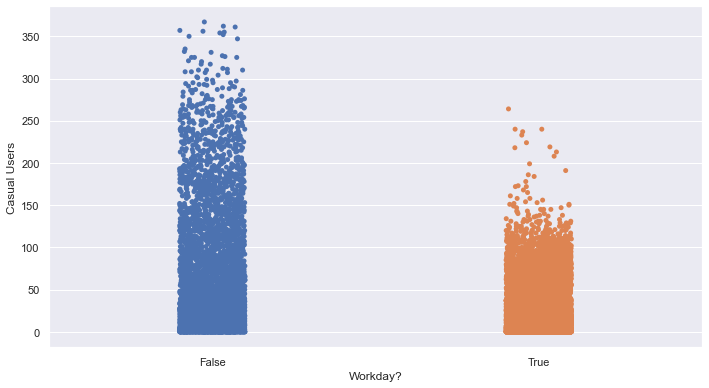

In [31]:
sns.stripplot(data=df,x='Workday?', y='Casual Users')

<AxesSubplot:xlabel='Day of Week', ylabel='Registered User'>

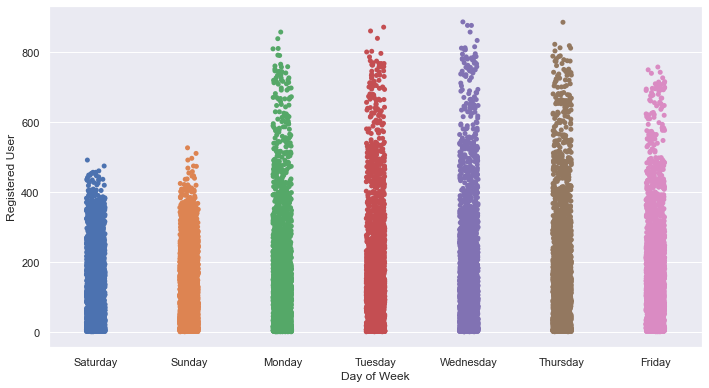

In [22]:
sns.stripplot(data=df,x='Day of Week', y='Registered User')

<AxesSubplot:xlabel='Workday?', ylabel='Casual Users'>

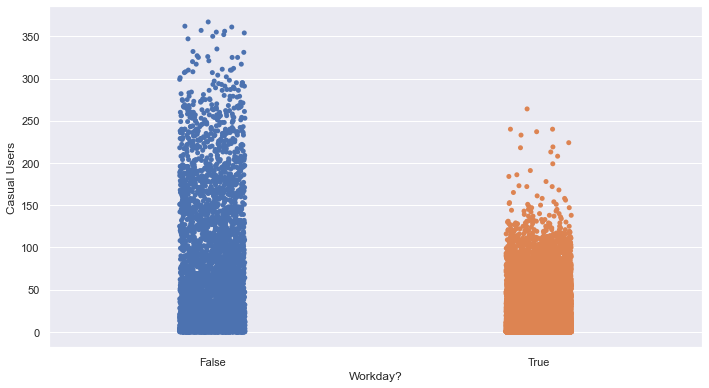

In [23]:
sns.stripplot(data=df,x='Workday?', y='Casual Users')

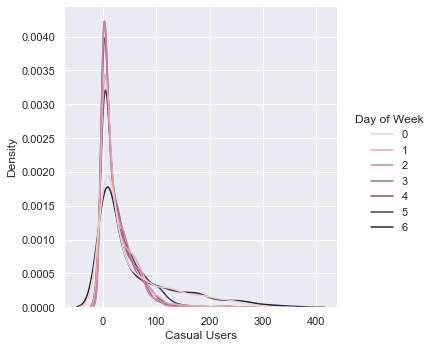

In [29]:
sns.displot(df, x="Casual Users", hue="Day of Week", kind="kde")

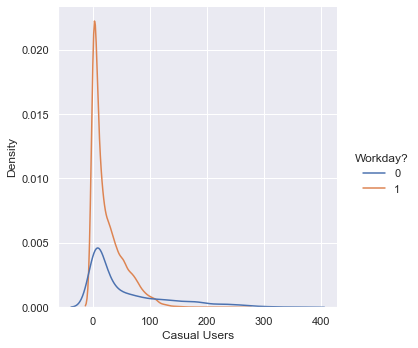

In [30]:
sns.displot(df, x="Casual Users", hue="Workday?", kind="kde")

#There are many more casual users of weekdays than non-weekdays, according to this plot.

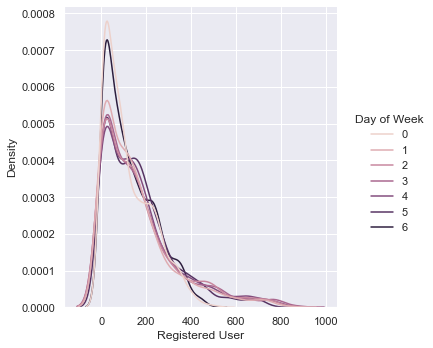

In [31]:
sns.displot(df, x="Registered User", hue="Day of Week", kind="kde")

There are a lot of registered users on Saturday and Sunday.

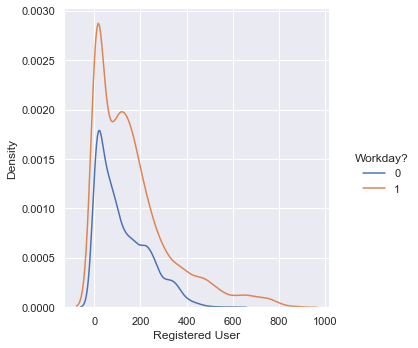

In [32]:
sns.displot(df, x="Registered User", hue="Workday?", kind="kde")

There seems to be more registered users on non-workdays, however this is likely becuase there is many more workdays than non-workdays.

- From the plots above, it is evident that there is an increase in both casual and registered users on the Saturdays and Sundays, compared to Monday-Friday.

- Interestingly, there seem to be a higher count of both casual and registered users on workdays, compared to non-workdays.

- There also seems to be a higher proportion of casual users on workdays to weekends, compared to registered users.

- When we look at the days individually, the highest count of users on Saturday and Sunday for both casual and registered users, but when the number of users is considered in terms of workdays, there are many more users on workdays than non-workdays. What is causing these seemingly contradictory results? The fact that there are many more weekdays than weekends! It is biased to compare the total count of registered and casual users on workdays vs. non-workdays for this reason. 
    
- Essentially, we can conlcude that there are a higher number of both casual and registered users PER DAY on weekend days as opposed to work days. 

2. Does weather affect the total number of users?

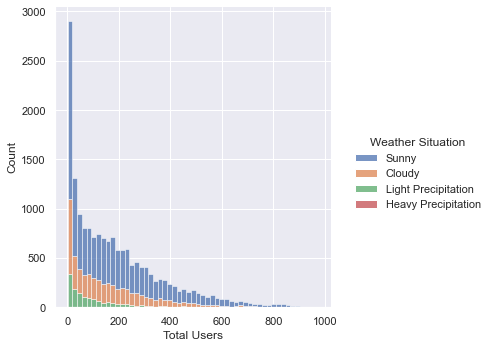

In [21]:
sns.displot(data=df, x= ("Total Users"), hue= 'Weather Situation',multiple='stack')

plt.show()

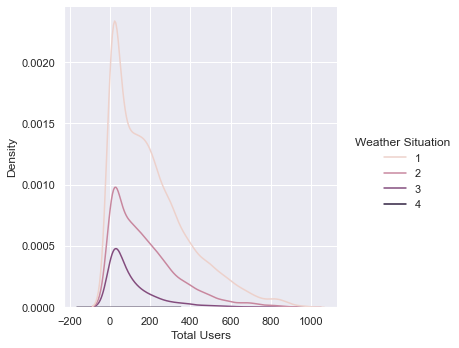

In [34]:
sns.displot(df, x="Total Users", hue="Weather Situation", kind="kde")

Evidently, there are many more users on sunny days, followed by cloudy days, with fewer users on light or heavy precipitation days. 

3. Is there a spike in number of users on holidays?

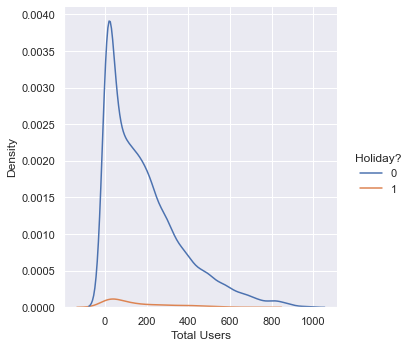

In [35]:
sns.displot(df, x="Total Users", hue="Holiday?", kind="kde")


This plot shows that there are many more users on non-holidays, but does does not provide any insight into relative amounts, so it is not useful. 

In [36]:
df2 = df[df['Holiday?']==True]
df3 = df[df['Holiday?']==False]

In [37]:
df2['Total Users'].mean()

156.87

In [38]:
df3['Total Users'].mean()

190.4285798921737

The average value of users in an hour is slightly lower on holidays than on non-holidays. Therefore, there is NOT a spike in users on holidays.